# Privacy TP 2
Tientso Ning

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from Crypto.Cipher import AES
from Crypto import Random
%matplotlib inline

# 1. Encryption

(250, 250)


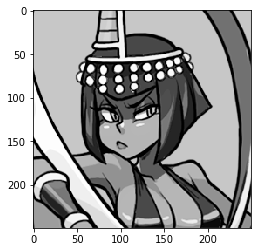

In [2]:
#read the image liftingbody
img = cv2.imread("eliza.png",0)
plt.imshow(img, cmap="Greys_r")
print(img.shape)

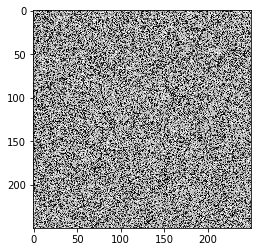

In [3]:
#create a permutation matrix
id_mat = np.identity(img.shape[0])
perm = np.random.permutation(np.copy(img).flatten())
perm_img = np.reshape(perm, img.shape)
plt.imshow(perm_img, cmap="Greys_r")

Text(0.5, 1.0, 'Permuted Image')

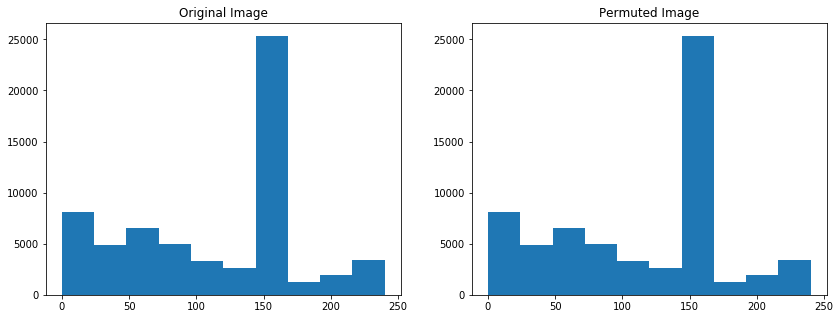

In [4]:
#do the histogram of both and compare
f, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].hist(img.flatten())
ax[0].set_title("Original Image")
ax[1].hist(perm_img.flatten())
ax[1].set_title("Permuted Image")

Here we can see that no information was lost, since the histograms show that the two images contains the exact same distribution of pixel values meaning that the image values were simply moved around.

In [5]:
#model block loss
def block_loss(img, N, M):
    loss = np.copy(img)
    
    #random location for block loss
    x = np.random.randint(0, img.shape[0])
    loss[x:x+N,x:x+M] = 0
    
    return loss

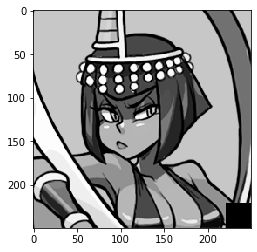

In [6]:
plt.imshow(block_loss(img, 50,50), cmap="Greys_r")

Text(0.5, 1.0, 'Reconstructed from Permuted')

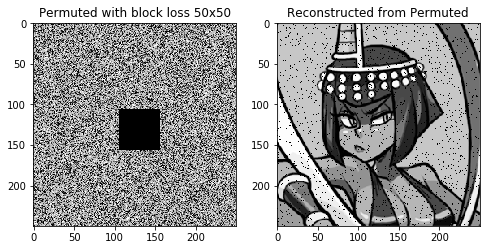

In [7]:
#take permuted image and apply block loss
ex3 = np.copy(img)
perm_mat = np.random.permutation(ex3.shape[0]*ex3.shape[1])
ex3_perm = np.reshape(ex3.flatten()[perm_mat], ex3.shape)
ex3_perm_loss = block_loss(ex3_perm, 50, 50)
inv_perm = np.argsort(perm_mat)
ex3_recon = np.reshape(ex3_perm_loss.flatten()[inv_perm], ex3.shape)

f, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(ex3_perm_loss, cmap="Greys_r")
ax[0].set_title("Permuted with block loss 50x50")
ax[1].imshow(ex3_recon, cmap="Greys_r")
ax[1].set_title("Reconstructed from Permuted")

Here we can see that because the permutation essentially "spreads out" the information, even when we have a block loss, that loss of information is spread out throughout the image. Our reconstruction is reminiscent of an image that underwent salt and pepper noise (well in this case just pepper). The conclusion is of course that the image is still somewhat preserved and understandable to the human user.

Text(0.5, 1.0, 'Noisy Image')

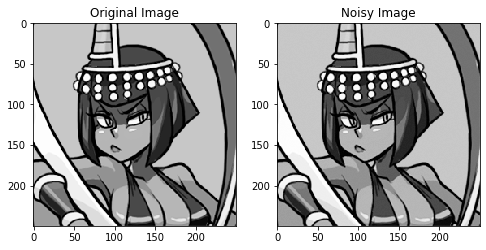

In [8]:
#generate a noisy image whose values {-1,1} are uniformly distributed
ex4 = np.copy(img)
noisy_img = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy_img[noisy_img == 0] = 1
noisy_img = np.reshape(noisy_img, ex4.shape)

#add to the image
step4 = ex4 + noisy_img

f,ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(ex4, cmap="Greys_r")
ax[0].set_title("Original Image")
ax[1].imshow(step4, cmap="Greys_r")
ax[1].set_title("Noisy Image")

We notice that since the pixel difference is only changed by 1, we don't really notice a difference at all between the images graphically (to the human user eyes)

Text(0.5, 1.0, 'Noise 15')

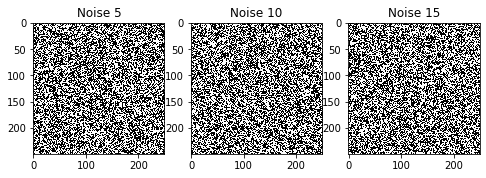

In [9]:
noisy5 = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy5[noisy5 == 0] = 5
noisy5[noisy5 == -1] = -5
noisy5 = np.reshape(noisy5, ex4.shape)

noisy10 = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy10[noisy10 == 0] = 10
noisy10[noisy10 == -1] = -10
noisy10 = np.reshape(noisy10, ex4.shape)

noisy15 = np.random.randint(-1,1,size=ex4.shape[0]*ex4.shape[1])
noisy15[noisy15 == 0] = 15
noisy15[noisy15 == -1] = -15
noisy15 = np.reshape(noisy15, ex4.shape)

f,ax = plt.subplots(1,3, figsize=(8,8))
ax[0].imshow(noisy5, cmap="Greys_r")
ax[0].set_title("Noise 5")
ax[1].imshow(noisy10, cmap="Greys_r")
ax[1].set_title("Noise 10")
ax[2].imshow(noisy15, cmap="Greys_r")
ax[2].set_title("Noise 15")

In [10]:
def PSNR(img1, img2):
    return 20 * math.log10(255.0/math.sqrt(np.mean((img1-img2)**2)))

[34.15140352195873, 28.130803608679106, 24.60897842756548]


Text(0.5, 1.0, 'Noise 15')

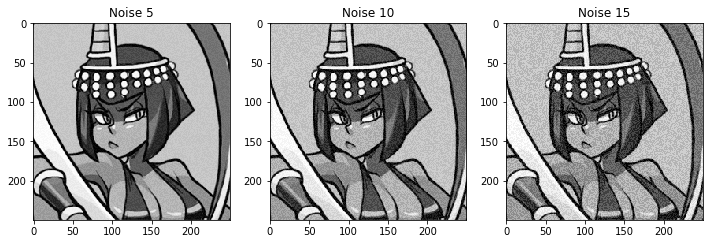

In [11]:
#add the noisy images and determine PSNR value
ex4_noise5 = ex4 + noisy5
ex4_noise10 = ex4 + noisy10
ex4_noise15 = ex4 + noisy15
x = [5,10,15]
y = [PSNR(ex4, ex4_noise5), PSNR(ex4, ex4_noise10), PSNR(ex4, ex4_noise15)]
print(y)

f,ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(ex4_noise5, cmap="Greys_r")
ax[0].set_title("Noise 5")
ax[1].imshow(ex4_noise10, cmap="Greys_r")
ax[1].set_title("Noise 10")
ax[2].imshow(ex4_noise15, cmap="Greys_r")
ax[2].set_title("Noise 15")

Text(0, 0.5, 'PSNR Value')

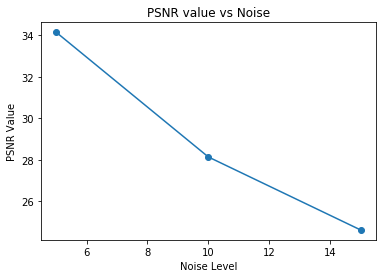

In [12]:
plt.plot(x,y, 'o-')
plt.title("PSNR value vs Noise")
plt.xlabel("Noise Level")
plt.ylabel("PSNR Value")

We can see a big decrease in the PSNR value, even though we can see from before that the image quality has not been degraded to the point of unrecognition. However, because PSNR is calculated using MSE, any small changes in the pixels will be reflected in the PSNR value even if the image itself doesn't seem that altered.

# 2. Classical Cryptography

In [13]:
#taken from python AES library
eliza = np.copy(img)
key = Random.new().read(AES.block_size)
iv = Random.new().read(AES.block_size)
parameters = AES.new(key, AES.MODE_CFB, iv)
enc_eliza = parameters.encrypt(eliza)
dec_eliza = parameters.decrypt(enc_eliza)

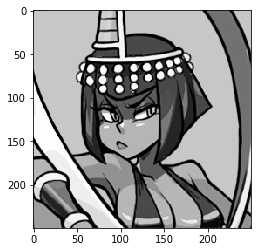

In [14]:
#confirm that encrypt decrypt works
test = np.frombuffer(dec_eliza, dtype=np.uint8)
test = np.reshape(test, (250,250))
plt.imshow(test, cmap="Greys_r")

Text(0.5, 1.0, 'Encrypted Image')

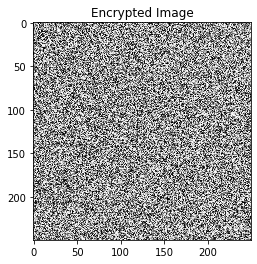

In [15]:
#simulate a single bit error
enc_bits = np.reshape(np.frombuffer(enc_eliza, np.uint8),(250,250))
plt.imshow(enc_bits, cmap="Greys_r")
plt.title("Encrypted Image")

In [16]:
#overwrite one of the pixels with a random value
enc_bits_mod = np.copy(enc_bits).flatten()
enc_bits_mod[np.random.randint(0,len(enc_bits_mod))] = np.random.randint(0,255)
enc_bits_mod = np.reshape(enc_bits_mod, (250,250))

Proof bit changed:  [121]


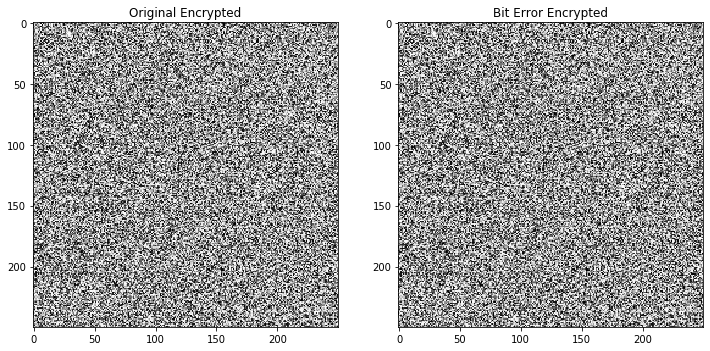

In [17]:
f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(enc_bits, cmap="Greys_r")
ax[1].imshow(enc_bits_mod, cmap="Greys_r")
ax[0].set_title("Original Encrypted")
ax[1].set_title("Bit Error Encrypted")
print("Proof bit changed: ", enc_bits_mod[enc_bits != enc_bits_mod])

Differences:  [ 30  30  30  30  30  30  30  30  30  30  28  13   0   0   1 107 161]


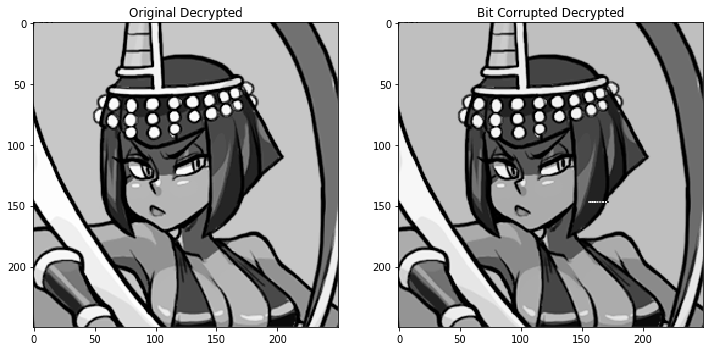

In [18]:
#decrypt and show results
dec_eliza_mod = parameters.decrypt(enc_bits_mod)
dec_eliza_mod = np.reshape(np.frombuffer(dec_eliza_mod, np.uint8),(250,250))

f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(test, cmap="Greys_r")
ax[1].imshow(dec_eliza_mod, cmap="Greys_r")
ax[0].set_title("Original Decrypted")
ax[1].set_title("Bit Corrupted Decrypted")
print("Differences: ", test[test != dec_eliza_mod])

Here we see that a single pixel change cascaded to a 18 pixel alteration in the decrypted image. This occurs because the single pixel value in the encrypted format is decrypted accordingly and essentially the information that pixel of encryption was responsible for becomes lost.

Differences:  [ 53 170  91 ... 112  47 176]


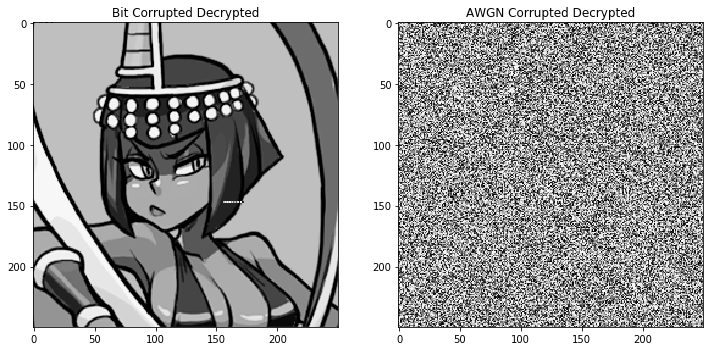

In [19]:
#add AWGN to enc_bits
awgn = np.random.randn(250,250)
enc_bits_noised = np.copy(enc_bits) + awgn
enc_bits_noised = enc_bits_noised.astype(np.uint8)

#decrypt and show results
dec_noised = parameters.decrypt(enc_bits_noised)
dec_noised = np.reshape(np.frombuffer(dec_noised, np.uint8),(250,250))

f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(dec_eliza_mod, cmap="Greys_r")
ax[1].imshow(dec_noised, cmap="Greys_r")
ax[0].set_title("Bit Corrupted Decrypted")
ax[1].set_title("AWGN Corrupted Decrypted")
print("Differences: ", dec_noised[dec_noised != dec_eliza_mod])

Here we can see that AWGN totally ruined the decryption process and we cannot recover anything about the original image, showing that standard cryptography is not robust enough to suffer from noise to the encrypted image.

# 3. Basic Data Hiding

In [20]:
#insert secret image into cover image
def insert_stego(secret, cover):
    
    '''
    inserts secret image into the cover image, producing a stego image
    '''
    secret = np.copy(secret)
    cover = np.copy(cover)
    
    assert secret.shape == cover.shape #same size
    rows, col = secret.shape[0], secret.shape[1]
    
    #split image into color channels
    cR, cG, cB = cv2.split(np.copy(cover))
    sR, sG, sB = cv2.split(np.copy(secret))
    
    #split color channels into bit planes
    cR_p = np.zeros((rows, col, 8))
    cG_p = np.zeros((rows, col, 8))
    cB_p = np.zeros((rows, col, 8))
    
    sR_p = np.zeros((rows, col, 8))
    sG_p = np.zeros((rows, col, 8))
    sB_p = np.zeros((rows, col, 8))
    
    for i in range(0, rows):
        for j in range(0, col):
            
            #cover layer
            binaryPixel = np.binary_repr(cR[i,j],8)
            binaryPixel2 = np.binary_repr(cG[i,j],8)
            binaryPixel3 = np.binary_repr(cB[i,j],8)
            
            #secret layer
            binaryPixel4 = np.binary_repr(sR[i,j],8)
            binaryPixel5 = np.binary_repr(sG[i,j],8)
            binaryPixel6 = np.binary_repr(sB[i,j],8)

            k=0
            for b in range(len(binaryPixel)-1,-1,-1):
                
                #cover layer
                cR_p[i,j,8-k-1] = int(binaryPixel[b],2)
                cG_p[i,j,8-k-1] = int(binaryPixel2[b],2)
                cB_p[i,j,8-k-1] = int(binaryPixel3[b],2)
                
                #secret layer
                sR_p[i,j,8-k-1] = int(binaryPixel4[b],2)
                sG_p[i,j,8-k-1] = int(binaryPixel5[b],2)
                sB_p[i,j,8-k-1] = int(binaryPixel6[b],2)
                
                k = k+1
    
    #reconstruct RGB    
    red_recon = np.stack((cR_p[:,:,0],cR_p[:,:,1],cR_p[:,:,2],cR_p[:,:,3],cR_p[:,:,4],sR_p[:,:,0],sR_p[:,:,1],sR_p[:,:,2]), axis=-1)
    green_recon = np.stack((cG_p[:,:,0],cG_p[:,:,1],cG_p[:,:,2],cG_p[:,:,3],cG_p[:,:,4],cG_p[:,:,5],sB_p[:,:,0],sB_p[:,:,1]), axis=-1)
    blue_recon = np.stack((cB_p[:,:,0],cB_p[:,:,1],cB_p[:,:,2],sG_p[:,:,0],sG_p[:,:,1],sG_p[:,:,2],sB_p[:,:,2],sB_p[:,:,3]), axis=-1)

    red_layer = np.zeros((rows,col))
    green_layer = np.zeros((rows,col))
    blue_layer = np.zeros((rows,col))
    
    for i in range(0, rows):
        for j in range(0, col):

            #select all bits of current pixel
            binaryPixel = red_recon[i,j,:]
            binaryPixel2 = green_recon[i,j,:]
            binaryPixel3 = blue_recon[i,j,:]

            #order from LSB to MSB, but in python the endian is different so we don't flip
            #binaryPixel = np.flip(binaryPixel)
            binaryPixel = binaryPixel.astype(int)
            binaryPixel2 = binaryPixel2.astype(int)
            binaryPixel3 = binaryPixel3.astype(int)

            #convert the array to decimal
            red_layer[i,j] = np.packbits(binaryPixel)
            green_layer[i,j] = np.packbits(binaryPixel2)
            blue_layer[i,j] = np.packbits(binaryPixel3)
    
    #combine layers to stego image
    return np.stack((red_layer, green_layer, blue_layer), axis=-1).astype(np.uint8)
    #return red_layer, green_layer, blue_layer

In [21]:
def extract_stego(stego):
    '''
    takes stego image (according to our scheme) and removes the secret image
    '''
    
    stego = np.copy(stego)
    rows, col = stego.shape[0], stego.shape[1]
    
    #separate into color channels
    red,grn,blu = cv2.split(stego)
    
    r_p = np.zeros((rows, col, 8))
    g_p = np.zeros((rows, col, 8))
    b_p = np.zeros((rows, col, 8))
    
    for i in range(0, rows):
        for j in range(0, col):

            #do color layers
            binaryPixel = np.binary_repr(red[i,j],8)
            binaryPixel2 = np.binary_repr(grn[i,j],8)
            binaryPixel3 = np.binary_repr(blu[i,j],8)

            k=0
            for b in range(len(binaryPixel)-1,-1,-1):
                
                #do color layers
                r_p[i,j,8-k-1] = int(binaryPixel[b],2)
                g_p[i,j,8-k-1] = int(binaryPixel2[b],2)
                b_p[i,j,8-k-1] = int(binaryPixel3[b],2)
                
                k = k+1

    #create the message
    empties = np.zeros((rows, col))
    red_layer = np.stack((r_p[:,:,5],r_p[:,:,6],r_p[:,:,7],empties,empties,empties,empties,empties,), axis=-1)
    green_layer = np.stack((b_p[:,:,3],b_p[:,:,4],b_p[:,:,5],empties,empties,empties,empties,empties,), axis=-1)  
    blue_layer = np.stack((g_p[:,:,6],g_p[:,:,7],b_p[:,:,6],b_p[:,:,7],empties,empties,empties,empties,), axis=-1)
    
    #stack layers
    red_recon = np.zeros((rows,col))
    green_recon = np.zeros((rows,col))
    blue_recon = np.zeros((rows,col))
    for i in range(0, rows):
        for j in range(0, col):

            #select all bits of current pixel
            binaryPixel = red_layer[i,j,:]
            binaryPixel2 = green_layer[i,j,:]
            binaryPixel3 = blue_layer[i,j,:]

            #order from LSB to MSB, but in python the endian is different so we don't flip
            #binaryPixel = np.flip(binaryPixel)
            binaryPixel = binaryPixel.astype(int)
            binaryPixel2 = binaryPixel2.astype(int)
            binaryPixel3 = binaryPixel3.astype(int)

            #convert the array to decimal
            red_recon[i,j] = np.packbits(binaryPixel)
            green_recon[i,j] = np.packbits(binaryPixel2)
            blue_recon[i,j] = np.packbits(binaryPixel3)
    
    
    return np.stack((red_recon, green_recon, blue_recon), axis=-1).astype(np.uint8)
    

Text(0.5, 1.0, 'Original Cover - America')

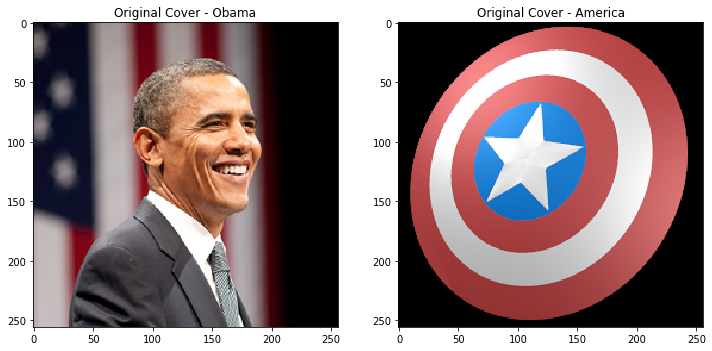

In [22]:
#establish cover image and secret image
cover = cv2.imread("./obama.PNG", 1)
cover = cv2.cvtColor(cover, cv2.COLOR_BGR2RGB)
secret = cv2.imread("./america.PNG", 1)
secret = cv2.cvtColor(secret, cv2.COLOR_BGR2RGB)

f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(cover)
ax[1].imshow(secret)
ax[0].set_title("Original Cover - Obama")
ax[1].set_title("Original Cover - America")

Text(0.5, 1.0, 'Obama with a secret')

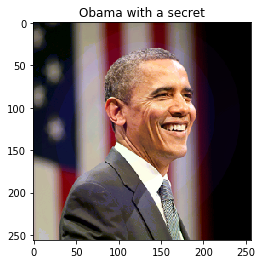

In [23]:
#insert the secret into the cover and display
stego = insert_stego(secret, cover)
plt.imshow(stego)
plt.title("Obama with a secret")

Text(0.5, 1.0, 'Extracted secret')

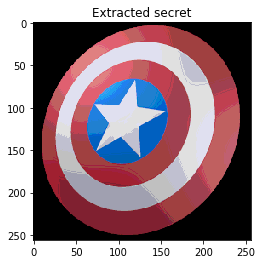

In [24]:
#remove the secret and show it
extracted = extract_stego(np.copy(stego))
plt.imshow(extracted)
plt.title("Extracted secret")

Text(0.5, 1.0, 'subtracted')

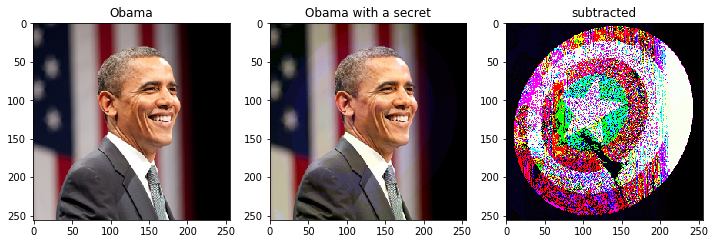

In [25]:
#visualize the difference between the stego image and original image
f, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(cover)
ax[1].imshow(stego)
ax[2].imshow(cover-stego)
ax[0].set_title("Obama")
ax[1].set_title("Obama with a secret")
ax[2].set_title("subtracted")

Here, we can see that the two images (original and stego) both are visually identical, meaning that they have perceptual invisibility. However, by subtracting the images we can see that they are in fact not the same image, and perhaps we could find this out using ML methods, meaning that this method of hiding might not be stochastically invisible.
However, the task of inserting and extracting a secret image inside a cover image was accomplished with perceptual invisibility.